# Homework 3
## Question 5 [10 points]

This document is to reproduce the Figure 2(a)(b)(c) in Gentemann, Chelle L., Fewings, Melanie R. and García‐Reyes, Marisol. "[Satellite sea surface temperatures along the West Coast of the United States during the 2014–2016 northeast Pacific marine heat wave.](https://agupubs.onlinelibrary.wiley.com/doi/10.1002/2016GL071039)" _Geophysical Research Letters_ 44, no. 1 (2017): 312-319. [DOI: 10.1002/2016GL071039](https://doi.org/10.1002/2016GL071039).

### It worth to note that the provided data for this homework has different longitude range (132W-), with original date used in the paper(138W-), which explains the cropped fraction of the figure left boundary.


## Figure 2(a) The maximum 5 day average SST anomaly at each location during 2002 to July 2016, relative to the 2002–2012 climatolog

In [1]:
# Import and setting params
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely
import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

Load data

In [2]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")

Select data by date range and take moving average by 5 days

In [3]:
sst_0212 = ds.sel(time=slice('2002-01-01', '2012-12-31')).analysed_sst
sst_0212_5_day_avg = sst_0212.rolling(time=5, center=True, min_periods=1).mean()

sst_0216 = ds.sel(time=slice('2002-01-01', '2016-07-31')).analysed_sst
sst_0216_5_day_avg = sst_0216.rolling(time=5, center=True, min_periods=1).mean()

Calculate the climatology of each day of year using data during 2002 - July 2012 after 5 days average

In [4]:
climatology = sst_0212_5_day_avg.groupby('time.dayofyear').mean('time', keep_attrs=True, skipna=False)

Pick the maximum five days average SST anomaly at each location for the visualization of Fig2(a)

In [5]:
sst_max_anomolies = (sst_0216_5_day_avg.groupby('time.dayofyear') - climatology).max(dim='time')

Visualization

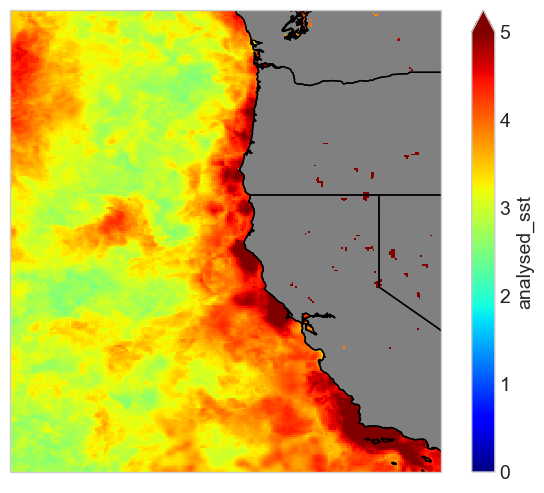

In [6]:
ax = plt.subplot(projection=crs)
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))
ax.coastlines("10m", color="k")
sst_max_anomolies.plot(ax=ax, transform=crs, cmap='jet', vmin=0, vmax=5)
plt.savefig('outputs/Q05-f2a.png')

In [7]:
plt.close()

## Figure 2(b) maximum anomaly month

Identify the month correspond to the maximum anomaly

In [8]:
max_month = (sst_0216_5_day_avg.groupby('time.dayofyear') - climatology).idxmax(dim='time').dt.month

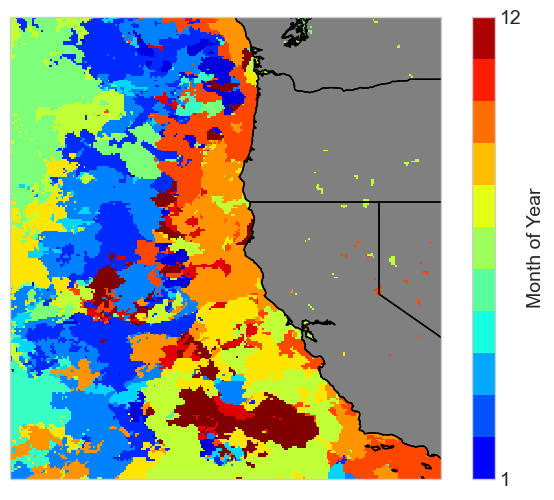

In [9]:
# Visualization
ax = plt.subplot(projection=crs)
fig=max_month.plot(ax=ax, transform=crs, add_colorbar=False, cmap='jet', vmin=0, vmax=12)
cbar = plt.colorbar(fig, boundaries=range(1, 13, 1))
cbar.set_label('Month of Year')
cbar.set_ticks([1,12])
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))
ax.coastlines("10m", color="k")
plt.savefig('outputs/Q05-f2b.png')

In [10]:
plt.close()

### Figrue 2(c) maximum anomaly year

Identify the month correspond to the maximum anomaly

In [11]:
max_year = (sst_0216_5_day_avg.groupby('time.dayofyear') - climatology).idxmax(dim='time').dt.year

Customized color map to match the color in paper with accurate RGB color

In [12]:
year_cmap = matplotlib.colors.ListedColormap(
    ((  6/255,  59/255, 253/255), # 2013
    ( 74/255, 255/255,   1/255), # 2014
    (250/255, 144/255,   1/255), # 2015
    (195/255,   1/255,  33/255) # 2016
     ))

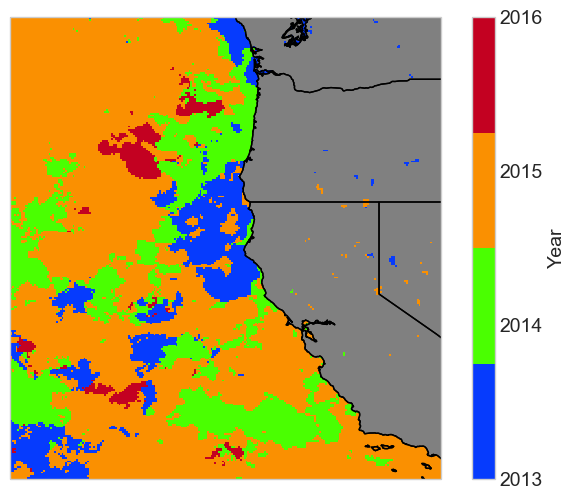

In [13]:
# Visualization
ax = plt.subplot(projection=crs)
fig=max_year.plot(ax=ax, transform=crs, add_colorbar=False, cmap=year_cmap, vmin=2013, vmax=2016)
cbar = plt.colorbar(fig)
cbar.set_label('Year')
cbar.set_ticks([2013, 2014, 2015, 2016])
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))
ax.coastlines("10m", color="k")
plt.savefig('outputs/Q05-f2c.png')

In [14]:
plt.close()